In [1]:
""" Simple script to simulate a simple supply chain economy according to 
a generalized version of the paper by Bak et al, 1992. Although the 
mechanism of propagation is the same, now it works for any network structure.

In the first example we show that it replicates the original results.
"""

import numpy as np
import matplotlib.pyplot as plt
from ProdNet import GeneralizedPerBak
from ProdNet.lib import icdf
import scipy.sparse as sp

# Select economy depth and width, and total number of iterations
L = 1600
N = L**2
T = 1000

# Define supply network according to Per Bak
B = np.zeros(N, dtype='u1')
B[:L] = 1
data = [1]*(2*L*(L-1))
row = [None]*(2*L*(L-1))
col = [None]*(2*L*(L-1))
i = 0
for n in range(N - L):
    col[i] = n
    row[i] = n+L
    col[i+1] = n
    if (n + 1) % L == 0:
        row[i+1] = n+1
    else:
        row[i+1] = n+1+L
        
    i += 2

A = sp.coo_matrix((data, (row, col)), shape=(N, N), dtype='u1')

In [2]:
# Initialize simulation object
model = GeneralizedPerBak(N, T, A, B=B, P_cap=np.ones(N)*2)

# Compute p, probability of demand "shock"
model.set_final_demand()

In [3]:
# Simulate
model.simulate()

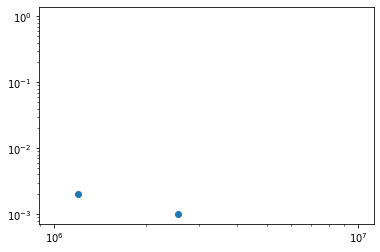

In [4]:
# Plot Y distribution
Y = np.sum(model.P, axis=1)
x, p = icdf(Y)
plt.scatter(x, p)
plt.yscale('log')
plt.xscale('log')
plt.show()